# 03. Country Analysis

This notebook provides a detailed look at COVID-19 statistics by country.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
data_dir = "../archive"

## 1. Load Data

In [2]:
country_wise = pd.read_csv(os.path.join(data_dir, "country_wise_latest.csv"))
full_grouped = pd.read_csv(os.path.join(data_dir, "full_grouped.csv"))
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])

## 2. Top 10 Countries - Total Cases

/tmp/ipykernel_5098/2844749054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='viridis')


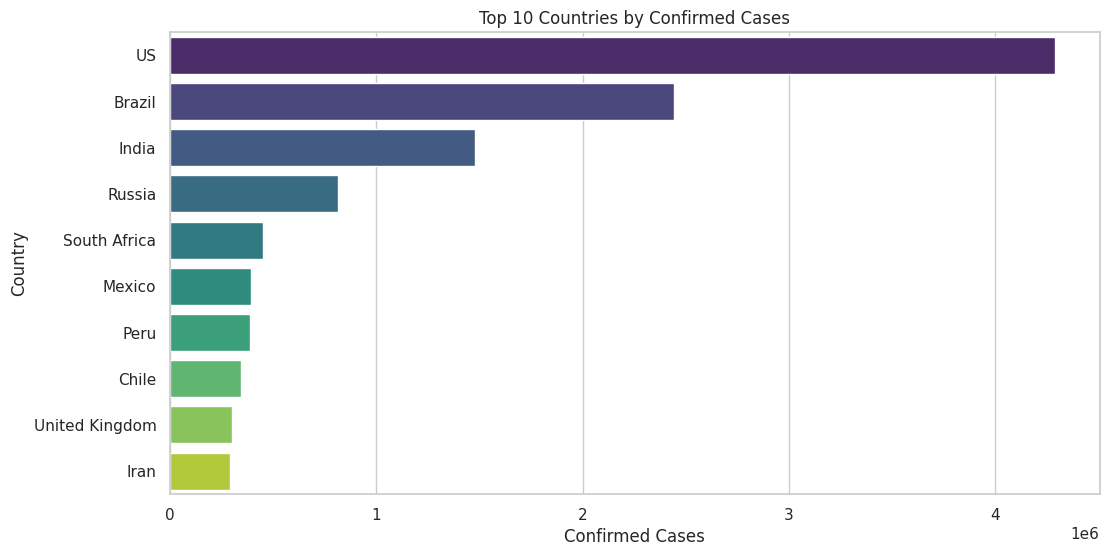

In [3]:
top_countries = country_wise.nlargest(10, 'Confirmed')

plt.figure(figsize=(12, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()

## 3. Case Trajectory for Top 5 Countries

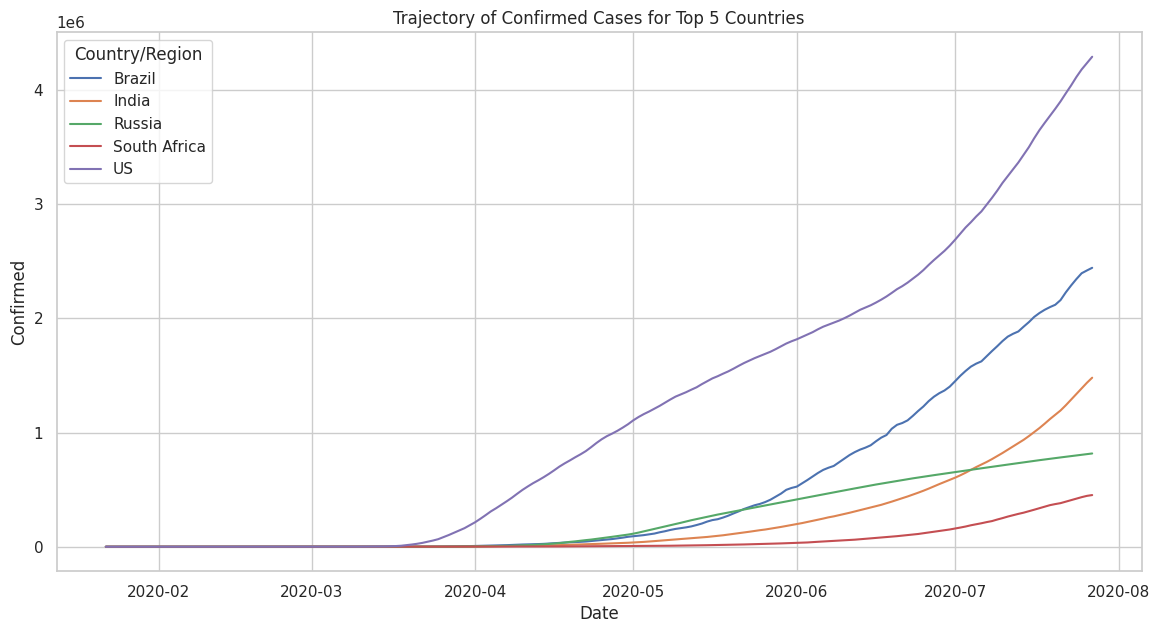

In [4]:
top_5_names = top_countries['Country/Region'].head(5).tolist()
top_5_data = full_grouped[full_grouped['Country/Region'].isin(top_5_names)]

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Confirmed', hue='Country/Region', data=top_5_data)
plt.title('Trajectory of Confirmed Cases for Top 5 Countries')
plt.show()

## 4. Deaths per 100 Cases (Mortality Rate)
Comparing the severity of the outbreak in the most affected countries.

/tmp/ipykernel_5098/3291407988.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deaths / 100 Cases', y='Country/Region', data=top_mortality, palette='Reds_r')


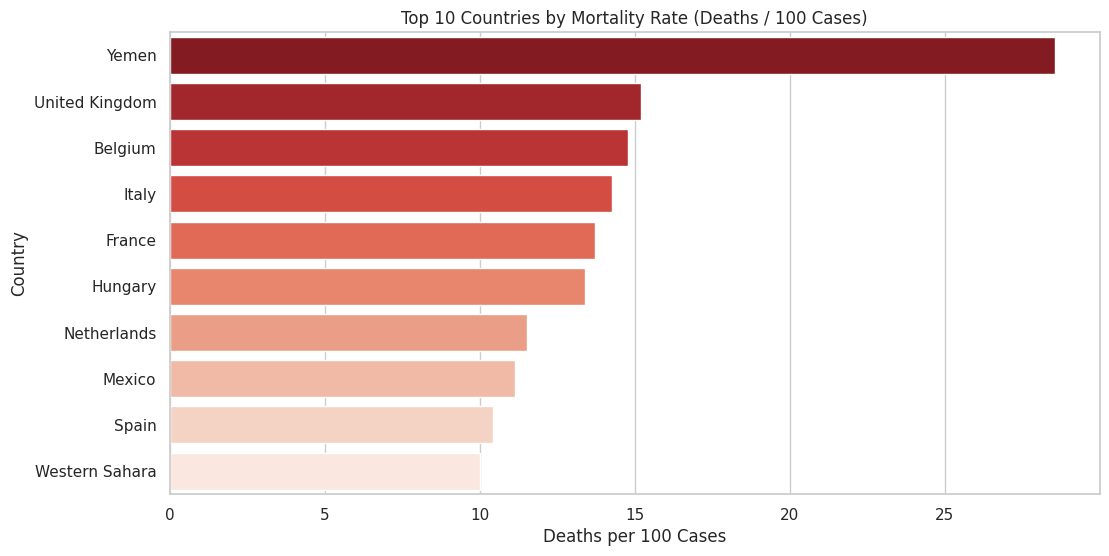

In [5]:
top_mortality = country_wise.nlargest(10, 'Deaths / 100 Cases')

plt.figure(figsize=(12, 6))
sns.barplot(x='Deaths / 100 Cases', y='Country/Region', data=top_mortality, palette='Reds_r')
plt.title('Top 10 Countries by Mortality Rate (Deaths / 100 Cases)')
plt.xlabel('Deaths per 100 Cases')
plt.ylabel('Country')
plt.show()

## 5. Active vs Closed Cases (Top 10 Countries)
Visualizing the proportion of active cases versus closed cases (Recovered + Deaths).

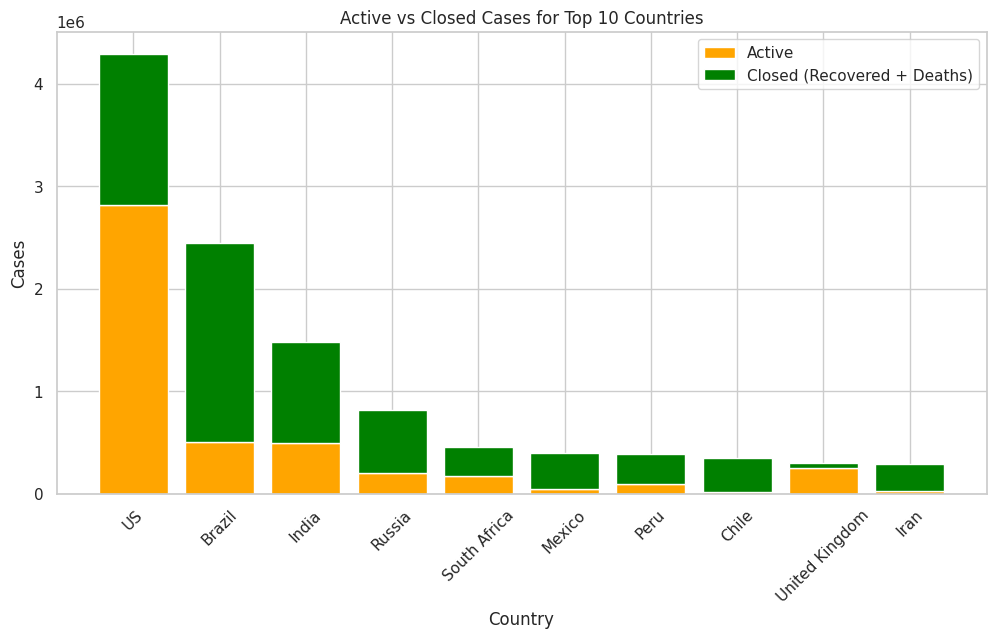

In [6]:
top_10_confirmed = country_wise.nlargest(10, 'Confirmed').copy()
top_10_confirmed['Closed'] = top_10_confirmed['Recovered'] + top_10_confirmed['Deaths']

plt.figure(figsize=(12, 6))
plt.bar(top_10_confirmed['Country/Region'], top_10_confirmed['Active'], label='Active', color='orange')
plt.bar(top_10_confirmed['Country/Region'], top_10_confirmed['Closed'], bottom=top_10_confirmed['Active'], label='Closed (Recovered + Deaths)', color='green')
plt.title('Active vs Closed Cases for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 6. Case Distribution by WHO Region

/tmp/ipykernel_5098/2428592636.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=who_region_cases.values, y=who_region_cases.index, palette='magma')


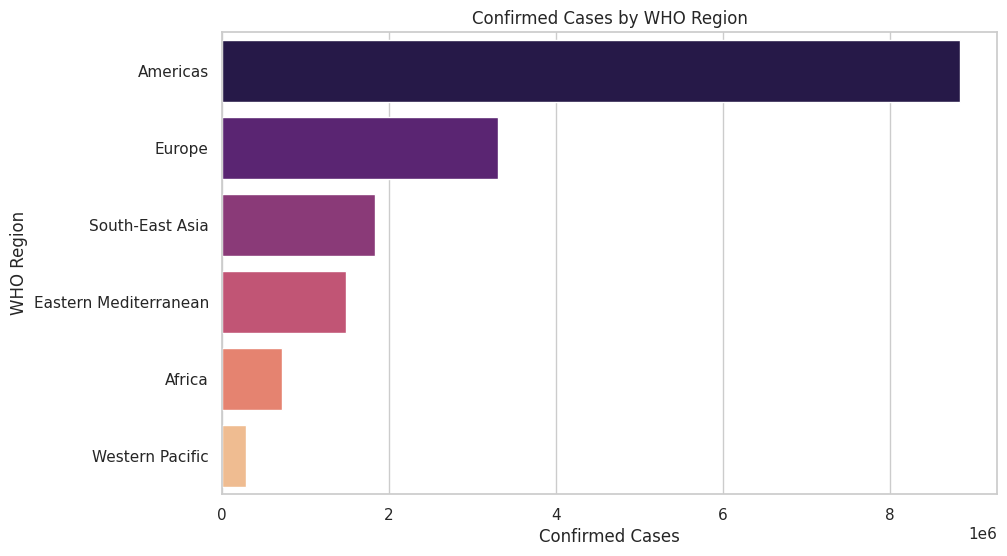

In [7]:
who_region_cases = country_wise.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=who_region_cases.values, y=who_region_cases.index, palette='magma')
plt.title('Confirmed Cases by WHO Region')
plt.xlabel('Confirmed Cases')
plt.show()